In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.worldometers.csv',index_col=0)

In [3]:
data.head()

,infected
date,
2020-01-23,845
2020-01-24,1317
2020-01-25,2015
2020-01-26,2800
2020-01-27,4581


In [4]:
data.tail()

,infected
date,
2020-03-19,244933
2020-03-20,275597
2020-03-21,305036
2020-03-22,337489
2020-03-23,378859


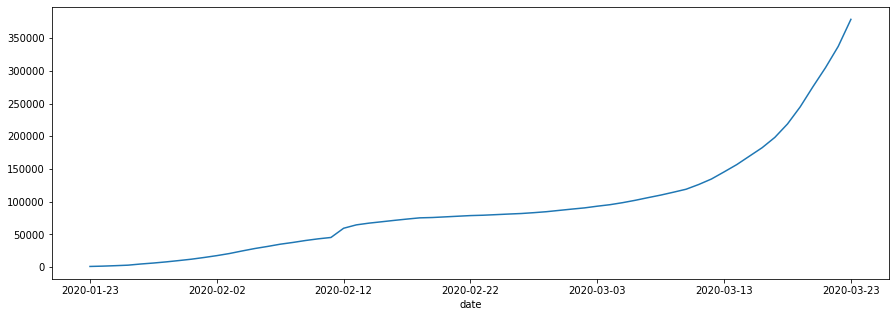

In [5]:
data.infected.plot(figsize=(15, 5))

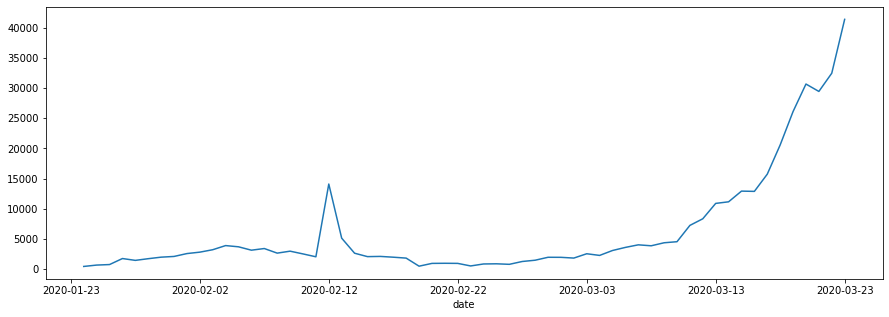

In [6]:
(data.infected - data.infected.shift(1)).plot(figsize=(15, 5))

In [7]:
from pyramid.arima import auto_arima

In [8]:
stepwise_model = auto_arima(data,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0); AIC=1099.929, BIC=1104.084, Fit time=0.016 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1101.712, BIC=1107.945, Fit time=0.536 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1101.723, BIC=1107.956, Fit time=0.285 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1103.711, BIC=1112.021, Fit time=1.134 seconds
Total fit time: 3.335 seconds


In [9]:
stepwise_model.aic()

1099.9286338318493

In [10]:
stepwise_model.fit(data)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [11]:
predicted_days = 5
firstPredictionDay = datetime.datetime.strptime(data.index[-1], '%Y-%m-%d') + datetime.timedelta(days = 1)

In [12]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [13]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))

2020-03-24 - 420922
2020-03-25 - 463678
2020-03-26 - 507128
2020-03-27 - 551270
2020-03-28 - 596106
